In [14]:
import numpy as np


In [15]:
import pandas as pd


In [16]:
data1 = pd.read_csv("All_Data_Aldi.csv")



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [18]:
data1.head(5)


,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Aldi,3.09,0.14,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 22 Pack/...,20240413,baby_products,False
1,Aldi,3.09,0.17,unit,Mamia Ultra-fit Peppa Pig Nappy Pants 18 Pack/...,20240413,baby_products,False
2,Aldi,3.59,0.09,unit,Mamia Ultra-fit Nappy Pants 40 Pack/Size 4,20240413,baby_products,False
3,Aldi,4.79,0.32,unit,Mamia Boy's Night Pants 15 Pack,20240413,baby_products,False
4,Aldi,4.79,0.32,unit,Mamia Girl's Night Pants 15 Pack,20240413,baby_products,False


In [19]:
# Convert `date` to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

In [20]:
print("Basic Statistics:")
print(data1[['prices_(£)', 'prices_unit_(£)']].describe())

Basic Statistics:
          prices_(£)  prices_unit_(£)
count  464863.000000    464859.000000
mean        2.216073         7.993101
std         2.323695        41.288759
min         0.010000         0.000000
25%         0.990000         2.230000
50%         1.590000         5.300000
75%         2.490000         9.000000
max       383.000000      2343.800000


In [22]:
# Step 2: Time Series Forecasting

# Aggregate daily average prices by category (if date range allows)
price_data = data.groupby(['date', 'category'])['prices_(£)'].mean().unstack()

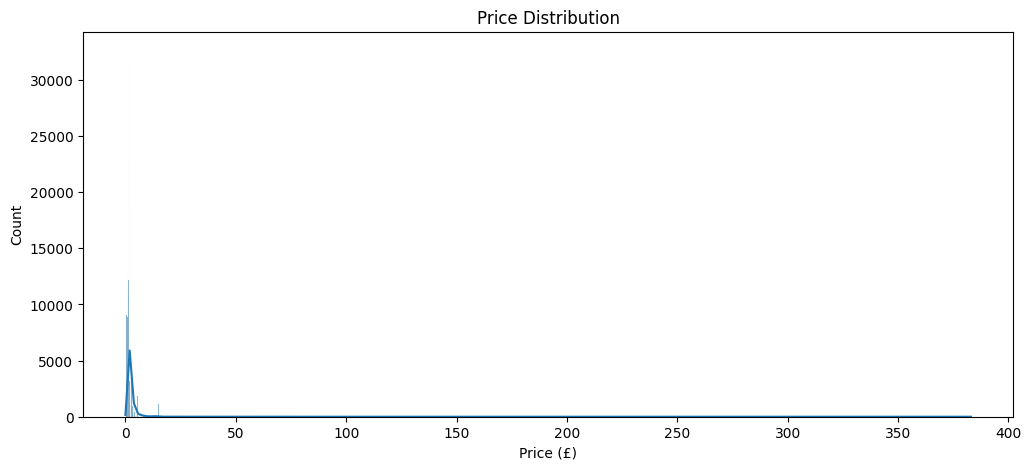

In [25]:
#@Price Distribution and Outliers
plt.figure(figsize=(12, 5))
sns.histplot(data['prices_(£)'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.show()


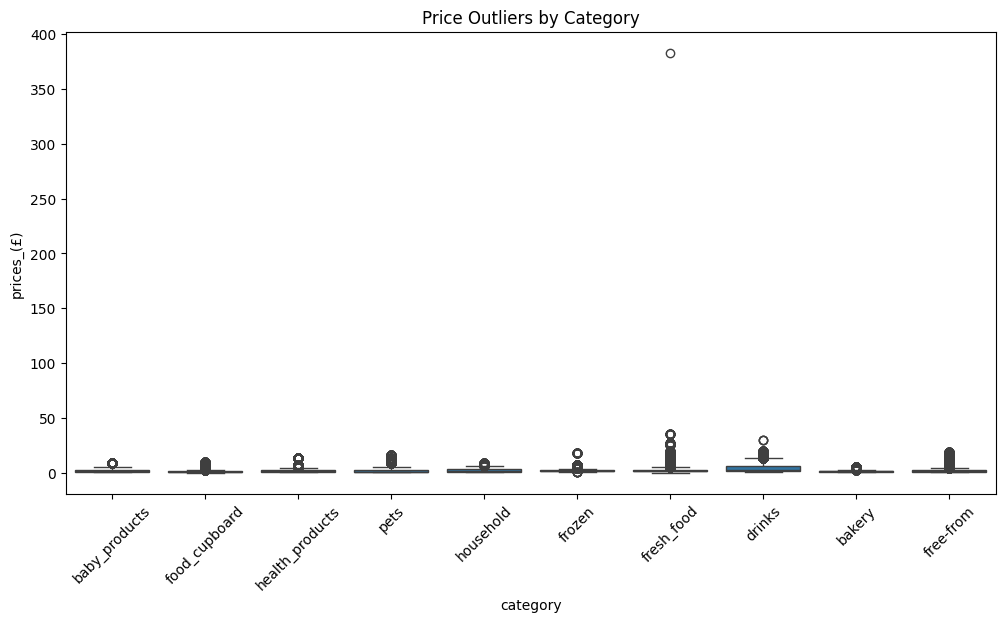

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='prices_(£)', data=data)
plt.title("Price Outliers by Category")
plt.xticks(rotation=45)
plt.show()

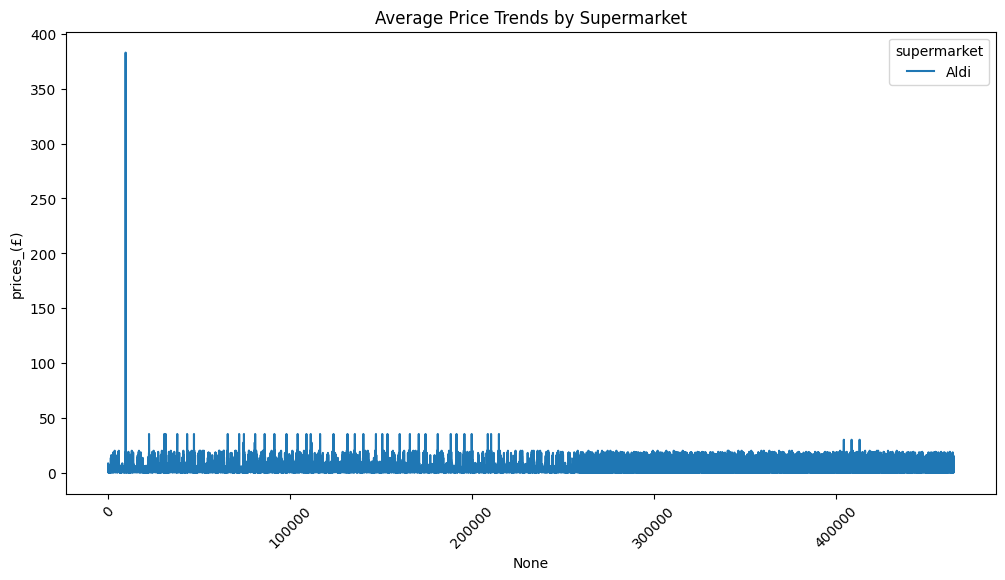

In [27]:
#Price Trend Per Supermarket
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='prices_(£)', hue='supermarket', data=data)
plt.title("Average Price Trends by Supermarket")
plt.xticks(rotation=45)
plt.show()


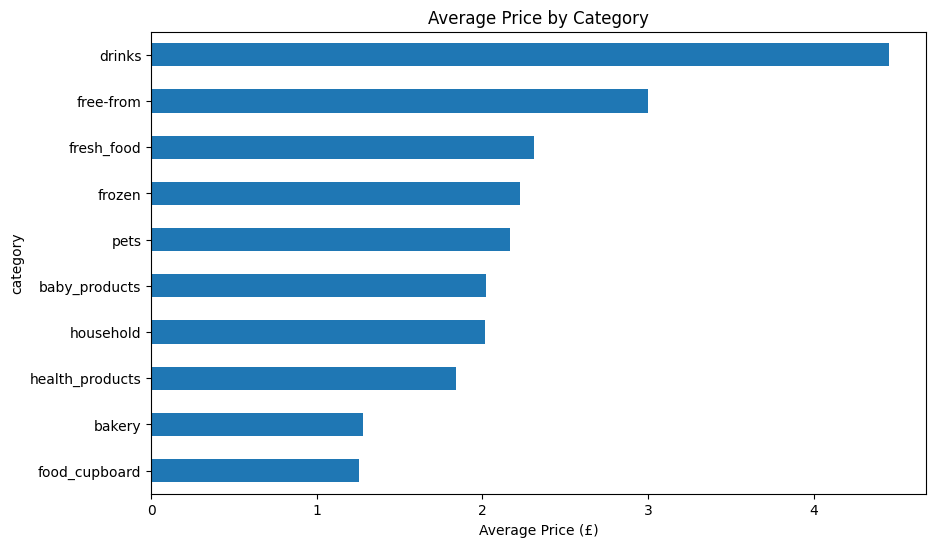

In [28]:
##Category Wise Analysis
category_avg_price = data.groupby('category')['prices_(£)'].mean().sort_values()
plt.figure(figsize=(10, 6))
category_avg_price.plot(kind='barh')
plt.title("Average Price by Category")
plt.xlabel("Average Price (£)")
plt.show()

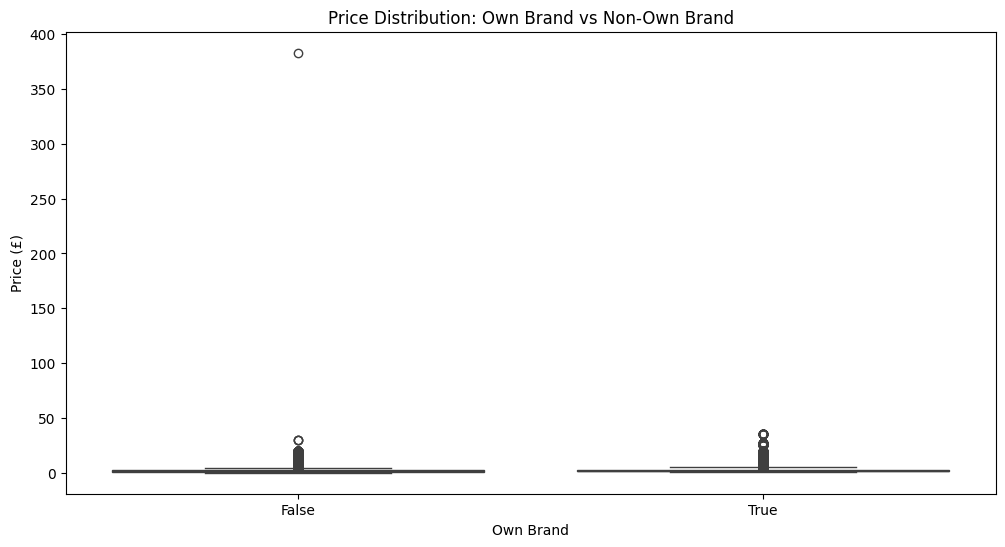

In [ ]:
#Own Brand vs Non Own Brand Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='own_brand', y='prices_(£)', data=data)
plt.title("Price Distribution: Own Brand vs Non-Own Brand")
plt.xlabel("Own Brand")
plt.ylabel("Price (£)")
plt.show()

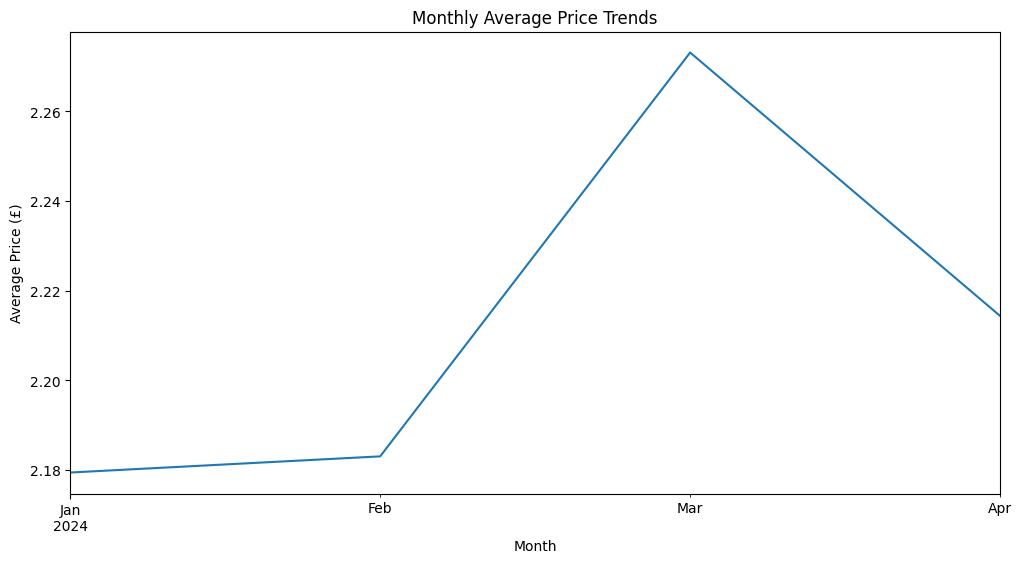

In [ ]:
#Monthly and Weekly Trends
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data.set_index('date', inplace=True)
data['month'] = data.index.to_period("M")
monthly_avg = data.groupby('month')['prices_(£)'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title("Monthly Average Price Trends")
plt.xlabel("Month")
plt.ylabel("Average Price (£)")
plt.show()


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
# Convert 'date' to datetime
data1['date'] = pd.to_datetime(data1['date'], format='%Y%m%d')

# Extract features from the date
data1['month'] = data1['date'].dt.month
data1['year'] = data1['date'].dt.year

# One-hot encode categorical variables
data1 = pd.get_dummies(data1, columns=['supermarket', 'category', 'own_brand'], drop_first=True)

# Drop unnecessary columns
data1.drop(['date', 'names', 'unit'], axis=1, inplace=True)

In [26]:
X = data1.drop('prices_(£)', axis=1)
y = data1['prices_(£)']

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestRegressor


In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [36]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.21514683212627422
Root Mean Squared Error: 0.5606115838929565


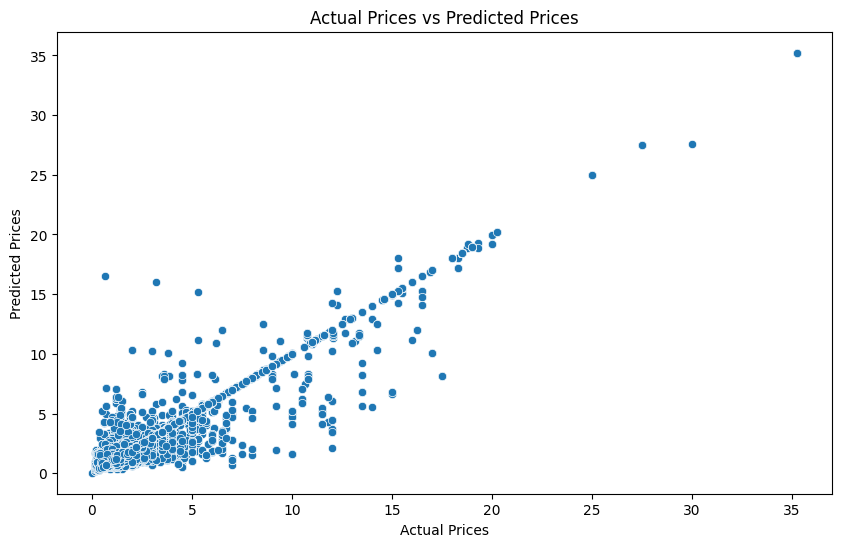

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()